In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

In [3]:
#import data
headbrain = pd.read_csv('headbrain.csv')

In [4]:
#check first 5 rows
headbrain.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
#check row and columns
headbrain.shape

(237, 4)

In [6]:
print(headbrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


In [7]:
print(headbrain.isnull().any())

Gender         False
AgeRange       False
HeadSize       False
BrainWeight    False
dtype: bool


In [8]:
print(headbrain.nunique())

Gender           2
AgeRange         2
HeadSize       221
BrainWeight    146
dtype: int64


In [15]:
headbrain.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

<AxesSubplot:xlabel='HeadSize', ylabel='BrainWeight'>

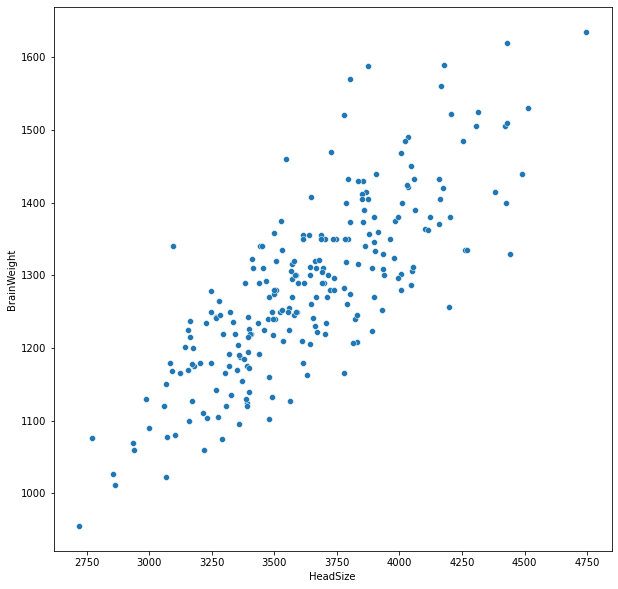

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='BrainWeight',x='HeadSize',data=headbrain)

In [17]:
headbrain  = headbrain.values

X = headbrain[:,2]
Y = headbrain[:,3]

X.shape,Y.shape

((237,), (237,))

# Calculate the slope and y-intercept

In [18]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator
    c = mean_y - m * mean_x
    
    return(m,c)

def predict(X,m,c):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y)

In [19]:
def r2score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2

slope =  0.25696700576341663
intercept =  347.62963264588905
R-squared : 0.6803602591876574


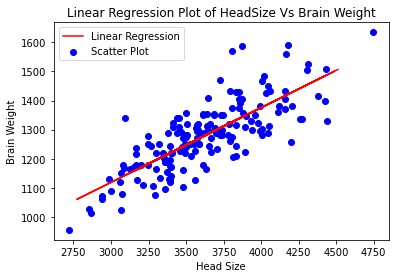

In [20]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
      
y_pred =  predict(X_test,m,c)

print("R-squared :",r2score(y_test,y_pred))

plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

We can see this using the inbuilt Sklearn Linear Regression model

In [42]:
#Reshape the input data into 2D array
X = X.reshape(len(X),1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

print("R-squared :",r2_score(y_test, y_predictions))


R-squared : 0.6304659211568686


# Saving Model

In [52]:
file = 'HeadSize- BrainWeight Use Case'
#save file
save = pickle.dump(reg,open(file,'wb'))